<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/regressionKerasBotonHousig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## REgression example  using Keras Boston Data 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import plot_model 

from sklearn import preprocessing
from sklearn.preprocessing import scale 

In [6]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [7]:
## Normalize data using Sklearn Standard scaler 

scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled =  scaler.transform(x_test)

In [25]:
## Model Selection 

model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))

model.add(Dense(1))

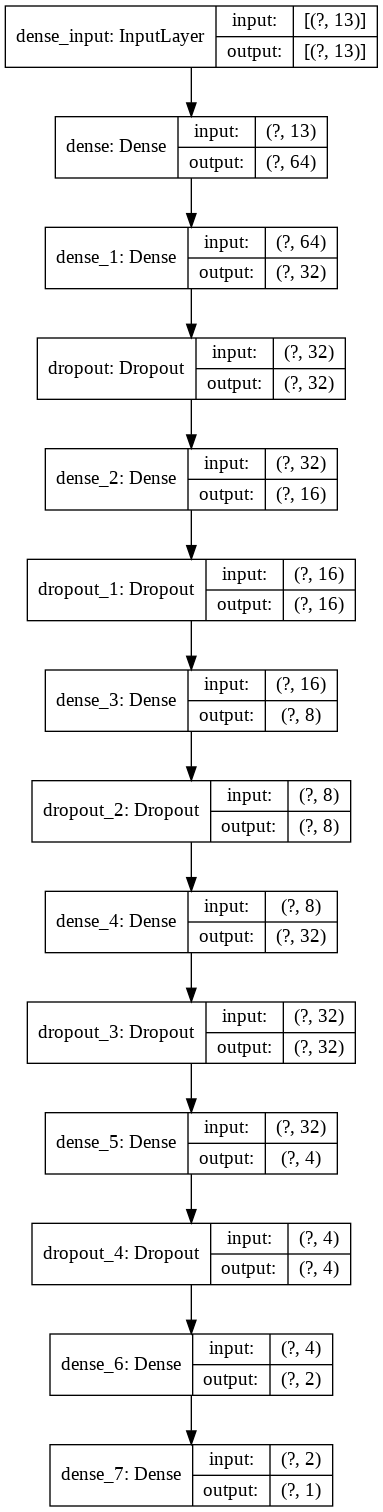

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [26]:
model.compile(loss='mse', metrics=['mean_absolute_error', 'accuracy'], optimizer='adam')

In [27]:
model.fit(x_train_scaled, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 583.4553 - mean_absolute_error: 22.3403 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 573.3178 - mean_absolute_error: 22.1301 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 537.9124 - mean_absolute_error: 21.3800 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 480.7846 - mean_absolute_error: 20.0523 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 386.2963 - mean_absolute_error: 17.4179 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 245.6096 - mean_absolute_error: 12.6051 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 175.7634 - mean_absolute_error: 10.0050 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [=============================

In [28]:
loss = model.evaluate(x_test_scaled, y_test)

print ('Loss = ', loss, ' :: Mean_absolute_error :', model.metrics)

4/4 [==============================] - 0s 3ms/step - loss: 47.6469 - mean_absolute_error: 5.6618 - accuracy: 0.0000e+00
Loss =  [47.64689254760742, 5.66175651550293, 0.0]  :: Mean_absolute_error : [<tensorflow.python.keras.metrics.Mean object at 0x7f138a7fa208>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f138e8f1cf8>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f138a7d45f8>]


In [29]:
  prediction = model.predict(x_test_scaled)

  for i in range(10):
    print ('Predicted : ', prediction[i], " : Expected : ", y_test[i])

Predicted :  [7.426334]  : Expected :  7.2
Predicted :  [14.747017]  : Expected :  18.8
Predicted :  [17.31901]  : Expected :  19.0
Predicted :  [26.320496]  : Expected :  27.0
Predicted :  [19.201323]  : Expected :  22.2
Predicted :  [16.455301]  : Expected :  24.5
Predicted :  [21.009993]  : Expected :  31.2
Predicted :  [17.081549]  : Expected :  22.9
Predicted :  [16.108097]  : Expected :  20.5
Predicted :  [17.030693]  : Expected :  23.2
